In [1]:
import os
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
grandparent_directory = os.path.abspath(os.path.join(parent_directory, os.pardir))
os.sys.path.append(grandparent_directory)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from tools.data_formatting import get_smoothed_moving_all_data, get_common_indexes_n_recordings


In [2]:
# Load data
animal = 'm120'
fov = 'fov1'
experiment1 = 'fam1novfam1'
run1 = 'fam1'
experiment2 = 'fam1novfam1'
run2 = 'fam1r2'
n_points = 360

firing_rates_run1, time_run1, phi_run1, cells_run1, tuning_curves1, phi_bins_run1 = get_smoothed_moving_all_data(animal, fov, experiment1, run1, n_points=n_points)
firing_rates_run2, time_run2, phi_run2, cells_run2, tuning_curves2, phi_bins_run2 = get_smoothed_moving_all_data(animal, fov, experiment2, run2, n_points=n_points)

sel_cells, ordered_cells, _ = get_common_indexes_n_recordings([cells_run1, cells_run2])
common_cells_run1 = cells_run1[sel_cells[0]][ordered_cells[0]]
common_cells_run2 = cells_run2[sel_cells[1]][ordered_cells[1]]
firing_rates_run1 = firing_rates_run1[:, sel_cells[0]][:, ordered_cells[0]]
firing_rates_run2 = firing_rates_run2[:, sel_cells[0]][:, ordered_cells[1]]
tuning_curves1 = tuning_curves1[:, sel_cells[0]][:, ordered_cells[0]]
tuning_curves2 = tuning_curves2[:, sel_cells[1]][:, ordered_cells[1]]

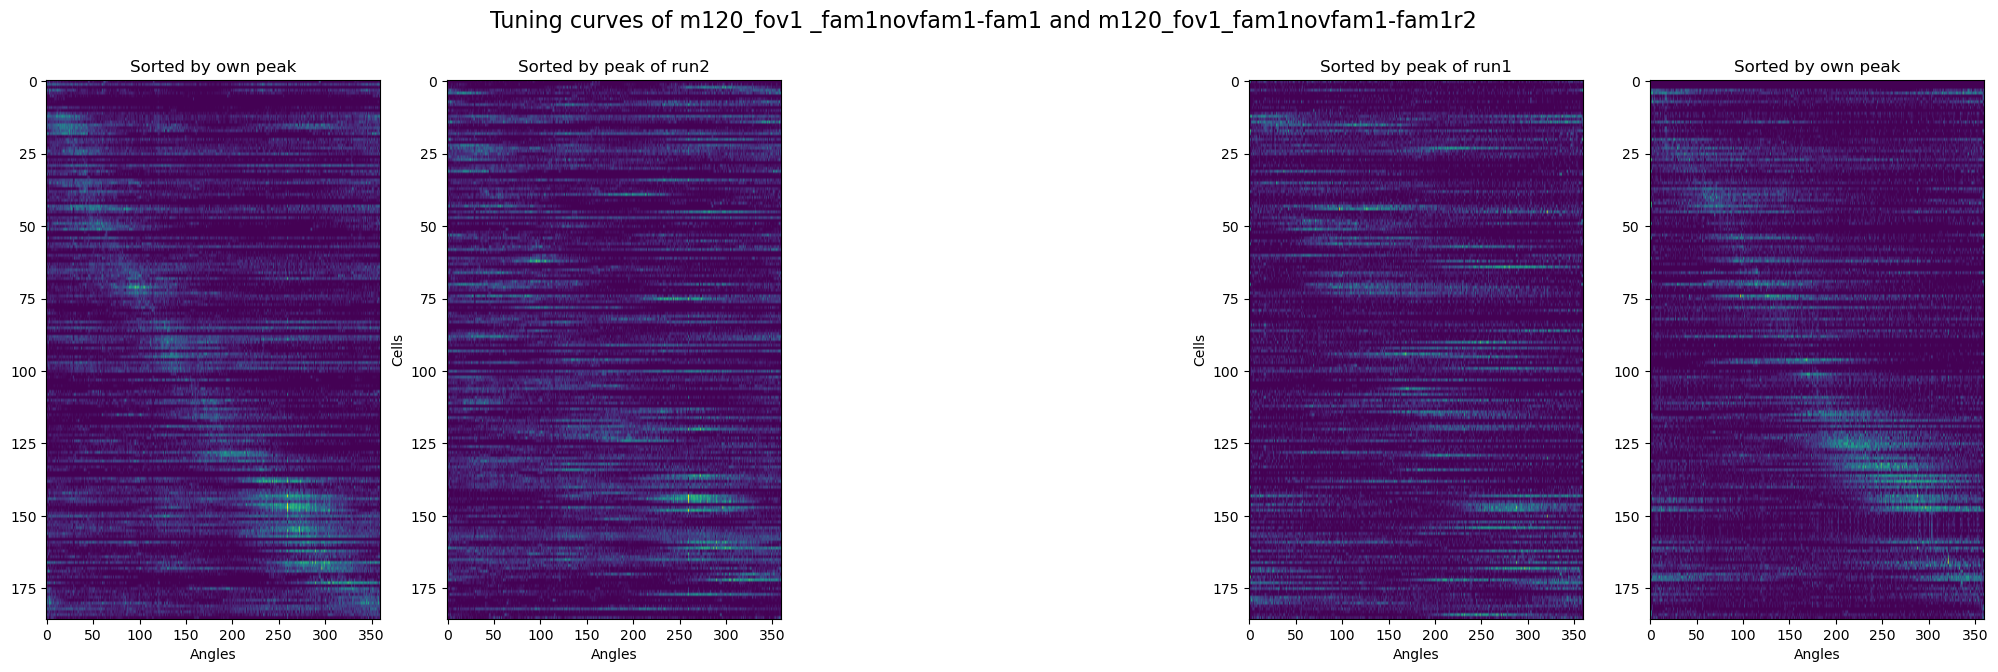

In [3]:
# Plot them
fig = plt.figure(figsize=(25, 7))
fig.suptitle(f'Tuning curves of {animal}_{fov} _{experiment1}-{run1} and {animal}_{fov}_{experiment2}-{run2}', fontsize=16)
grid = plt.GridSpec(ncols=5, nrows=1)

## Sorted by own peak
# Run1
ax = fig.add_subplot(grid[0, 0])
smoothed_tuning_curves1 = np.zeros((tuning_curves1.shape))
for i in range(tuning_curves1.shape[1]):
    smoothed_tuning_curves1[:,i] = np.convolve(tuning_curves1[:,i], np.ones((16,))/16, mode='same')
sorted_id_run1 = np.argsort(np.argmax(smoothed_tuning_curves1, axis=0))
ax.imshow(tuning_curves1[:,sorted_id_run1].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_title('Sorted by own peak')
# Run2
ax = fig.add_subplot(grid[0, 4])
smoothed_ring2 = np.zeros((tuning_curves2.shape))
for i in range(tuning_curves2.shape[1]):
    smoothed_ring2[:,i] = np.convolve(tuning_curves2[:,i], np.ones((16,))/16, mode='same')
sorted_id_run2 = np.argsort(np.argmax(smoothed_ring2, axis=0))
ax.imshow(tuning_curves2[:,sorted_id_run2].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_title('Sorted by own peak')

## Sorted by peak of the other run
# Run1
ax = fig.add_subplot(grid[0, 1])
ax.imshow(tuning_curves1[:,sorted_id_run2].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_ylabel('Cells')
ax.set_title('Sorted by peak of run2')
# Run2
ax = fig.add_subplot(grid[0, 3])
ax.imshow(tuning_curves2[:,sorted_id_run1].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_ylabel('Cells')
ax.set_title('Sorted by peak of run1')


plt.show()

# TODO can add a distribution of the shifts underneeath